In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [58]:
data = pd.read_csv('anonymized_data.csv')

In [59]:
data.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [60]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
EJWY     500 non-null float64
VALM     500 non-null float64
EGXO     500 non-null float64
HTGR     500 non-null float64
SKRF     500 non-null float64
NNSZ     500 non-null float64
NYLC     500 non-null float64
GWID     500 non-null float64
TVUT     500 non-null float64
CJHI     500 non-null float64
NVFW     500 non-null float64
VLBG     500 non-null float64
IDIX     500 non-null float64
UVHN     500 non-null float64
IWOT     500 non-null float64
LEMB     500 non-null float64
QMYY     500 non-null float64
XDGR     500 non-null float64
ODZS     500 non-null float64
LNJS     500 non-null float64
WDRT     500 non-null float64
LKKS     500 non-null float64
UOBF     500 non-null float64
VBHE     500 non-null float64
FRWU     500 non-null float64
NDYZ     500 non-null float64
QSBO     500 non-null float64
JDUB     500 non-null float64
TEVK     500 non-null float64
EZTM     500 non-null flo

(500, 31)

In [61]:
x=data.drop('Label',axis=1)

In [62]:
y=data['Label']

In [63]:
# SCALE THE DATA
# We are not doing train test split as it is unsupervised learning
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

In [65]:
scaled_data=scaler.fit_transform(x)


In [66]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [67]:
num_inputs =30
num_hidden = 2
num_outputs = 30

learning_rate = 0.01

In [68]:
# PLACEHOLDERS
X = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [69]:
#LAYERS
hidden_layer = fully_connected(X,num_outputs=2,activation_fn=None)
output_layer = fully_connected(hidden_layer,num_outputs=num_outputs,activation_fn=None)

In [70]:
# LOSS FUNCTION MEAN SQUARE ERROR
loss = tf.reduce_mean(tf.square(output_layer-X))

In [71]:
# OPTIMIZER TO MIMIZE LOSS function
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train = optimizer.minimize(loss)

In [72]:
#GLOBAL VARIABLE INITIALIZER
init = tf.global_variables_initializer()

In [73]:
steps = 1000
with tf.Session() as sess:
    
    sess.run(init)
    for i in range(steps):
        sess.run(train,feed_dict={X:scaled_data})
        
    output_2d = hidden_layer.eval(feed_dict={X:scaled_data})
    

In [74]:
output_2d.shape

(500, 2)

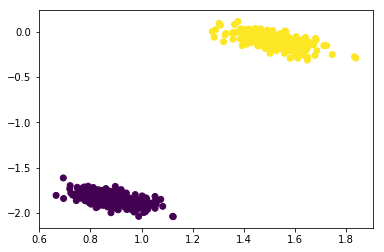

In [75]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data['Label'])